In [ ]:
from  fbprophet import Prophet
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as reader

In [ ]:
!pip install --upgrade pandas


In [ ]:
!pip install --upgrade pandas-datareader

In [ ]:
end=dt.datetime.now()
start="07-01-2003"
df= reader.get_data_yahoo('TSLA',start,end)
df=df.reset_index()

In [ ]:
model=Prophet()
df[['ds','y']]=df[['Date','Adj Close']]
model.fit(df)
df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000,2010-06-29,4.778000
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000,2010-06-30,4.766000
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000,2010-07-01,4.392000
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000,2010-07-02,3.840000
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000,2010-07-06,3.222000
...,...,...,...,...,...,...,...,...,...
2792,2021-08-02,726.940002,698.400024,700.000000,709.669983,33615800.0,709.669983,2021-08-02,709.669983
2793,2021-08-03,722.650024,701.010010,719.000000,709.739990,21620300.0,709.739990,2021-08-03,709.739990
2794,2021-08-04,724.900024,708.929993,711.000000,710.919983,17002600.0,710.919983,2021-08-04,710.919983
2795,2021-08-05,720.950012,711.409973,716.000000,714.630005,12919600.0,714.630005,2021-08-05,714.630005


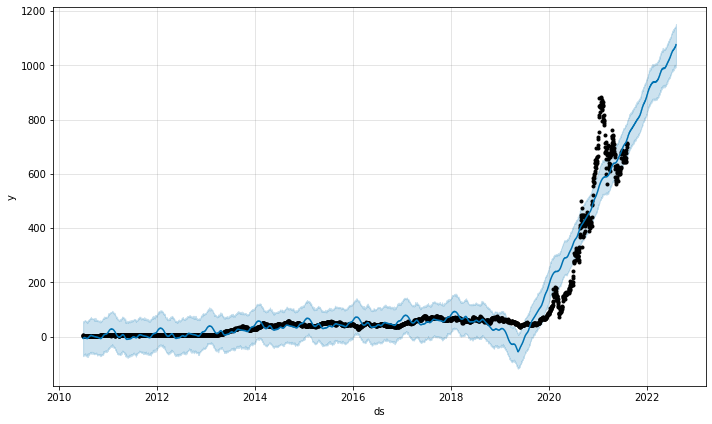

In [ ]:
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)
model.plot(forecast)
plt.show()

In [ ]:
!pip install --upgrade pandas

     |████████████████████████████████| 11.5 MB 7.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
forecast.tail(365)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2797,2021-08-07,734.378879,663.026557,793.314607,734.378879,734.378879,-5.120496,-5.120496,-5.120496,1.086223,1.086223,1.086223,-6.206719,-6.206719,-6.206719,0.0,0.0,0.0,729.258384
2798,2021-08-08,735.333070,662.228275,795.260134,735.333070,735.333070,-4.560323,-4.560323,-4.560323,1.086223,1.086223,1.086223,-5.646546,-5.646546,-5.646546,0.0,0.0,0.0,730.772747
2799,2021-08-09,736.287260,667.747910,796.264319,736.287260,736.287260,-5.189495,-5.189495,-5.189495,-0.130699,-0.130699,-0.130699,-5.058796,-5.058796,-5.058796,0.0,0.0,0.0,731.097765
2800,2021-08-10,737.241451,667.828408,795.553782,737.241451,737.241451,-4.768718,-4.768718,-4.768718,-0.316824,-0.316824,-0.316824,-4.451894,-4.451894,-4.451894,0.0,0.0,0.0,732.472732
2801,2021-08-11,738.195641,674.112098,799.464819,738.195641,738.195641,-3.954142,-3.954142,-3.954142,-0.119659,-0.119659,-0.119659,-3.834484,-3.834484,-3.834484,0.0,0.0,0.0,734.241499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,2022-08-02,1077.887426,991.485640,1142.662156,1044.383884,1114.629514,-8.723326,-8.723326,-8.723326,-0.316824,-0.316824,-0.316824,-8.406502,-8.406502,-8.406502,0.0,0.0,0.0,1069.164100
3158,2022-08-03,1078.841617,996.391919,1142.409940,1045.230496,1115.846225,-8.225570,-8.225570,-8.225570,-0.119659,-0.119659,-0.119659,-8.105912,-8.105912,-8.105912,0.0,0.0,0.0,1070.616046
3159,2022-08-04,1079.795807,1001.650458,1144.946725,1046.035744,1117.062936,-8.348237,-8.348237,-8.348237,-0.604064,-0.604064,-0.604064,-7.744173,-7.744173,-7.744173,0.0,0.0,0.0,1071.447571
3160,2022-08-05,1080.749998,1000.991071,1147.832174,1046.838490,1118.190892,-8.326899,-8.326899,-8.326899,-1.001201,-1.001201,-1.001201,-7.325698,-7.325698,-7.325698,0.0,0.0,0.0,1072.423099


In [ ]:
import statsmodels.api  as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
start1='08-19-2004'
Input=['GOOGL','^GSPC']
df1=reader.get_data_yahoo(Input,start1,end)['Adj Close']

df1

Symbols,GOOGL,^GSPC
Date,,
2004-08-19,50.220219,1091.229980
2004-08-20,54.209209,1098.349976
2004-08-23,54.754753,1095.680054
2004-08-24,52.487488,1096.189941
2004-08-25,53.053055,1104.959961
...,...,...
2021-08-02,2697.090088,4387.160156
2021-08-03,2712.600098,4423.149902
2021-08-04,2702.510010,4402.660156


In [ ]:
met_ret = df1.resample('M').ffill().pct_change()
met_ret=met_ret.dropna(axis=0)
met_ret

Symbols,GOOGL,^GSPC
Date,,
2004-09-30,0.265996,0.009364
2004-10-31,0.470988,0.014014
2004-11-30,-0.045426,0.038595
2004-12-31,0.059402,0.032458
2005-01-31,0.014679,-0.025290
...,...,...
2021-04-30,0.141080,0.052425
2021-05-31,0.001423,0.005486
2021-06-30,0.036040,0.022214


In [ ]:
x=met_ret['^GSPC']
y=met_ret['GOOGL']
x_sm=sm.add_constant(x)
model1=sm.OLS(y,x_sm)
result=model1.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GOOGL   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     66.36
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           3.85e-14
Time:                        07:44:08   Log-Likelihood:                 234.61
No. Observations:                 204   AIC:                            -465.2
Df Residuals:                     202   BIC:                            -458.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.005      2.770      0.006       0.004       0.026
^GSPC          1.0555      0.130      8.146      0.000       0.800       1.311
==============================================================================
Omnibus:                       84.415   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.536
Skew:                           1.579   Prob(JB):                     1.05e-82
Kurtosis:                       8.869   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

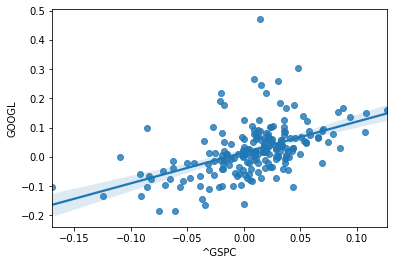

In [ ]:
import seaborn as sns
sns.regplot(x='^GSPC',y='GOOGL',data=met_ret)